# Predicting Housing Prices using Machine Learning

This notebook looks into using various Pythong-based machine learning and data science libraries in an attempt to build a 
machine learning model capable of predictig the median home value for a home in a Calfornian suburb.

This dataset was obtained from the StatLib repository. https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html.
It can be downloaded/loaded using the sklearn.datasets.fetch_california_housing function.

## Features
This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

**8 numeric, predictive attributes and the target**

    1. MedInc median income in block group

    2. HouseAge median house age in block group

    3. AveRooms average number of rooms per household

    4. AveBedrms average number of bedrooms per household
    
    5. Population block group population

    6. AveOccup average number of household members

    7. Latitude block group latitude

    8. Longitude block group longitude


## Preparing the tools

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## Load Data

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(as_frame= True, return_X_y= True)

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [7]:
X.shape, y.shape

((20640, 8), (20640,))

## Data Exploration (exploratory data analysis or EDA)

In [8]:
# Predictive Attributes
X.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


In [9]:
# Target variable
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

* Here each row represents a district
* There are 8 attributes
* Target attribute is 

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


<AxesSubplot:>

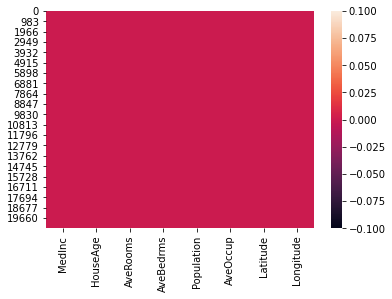

In [22]:
sns.heatmap(X.isnull())

In [11]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [12]:
# Target varible statistics
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

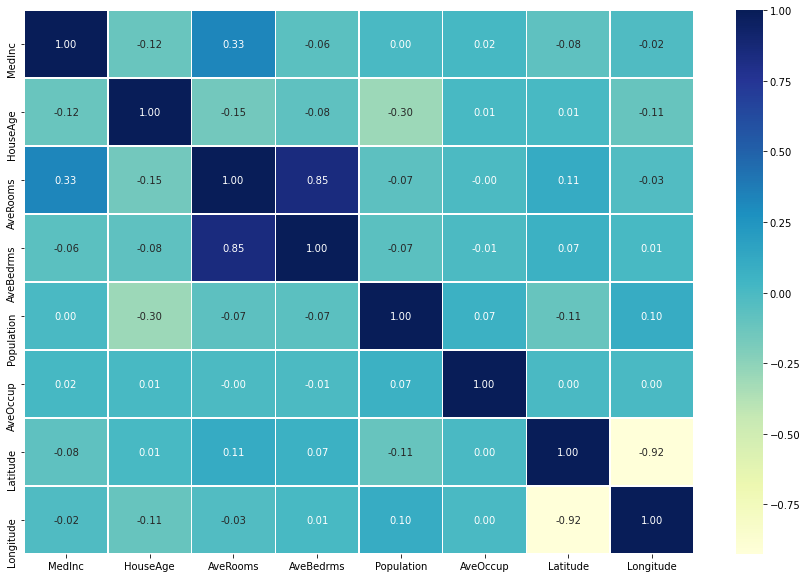

In [13]:
corr_matrix = X.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
    annot= True,
    linewidth=0.5,
    fmt=".2f",
    cmap="YlGnBu");

In [ ]:
corr_matrix["MedInc"].sort_values(ascending= False)

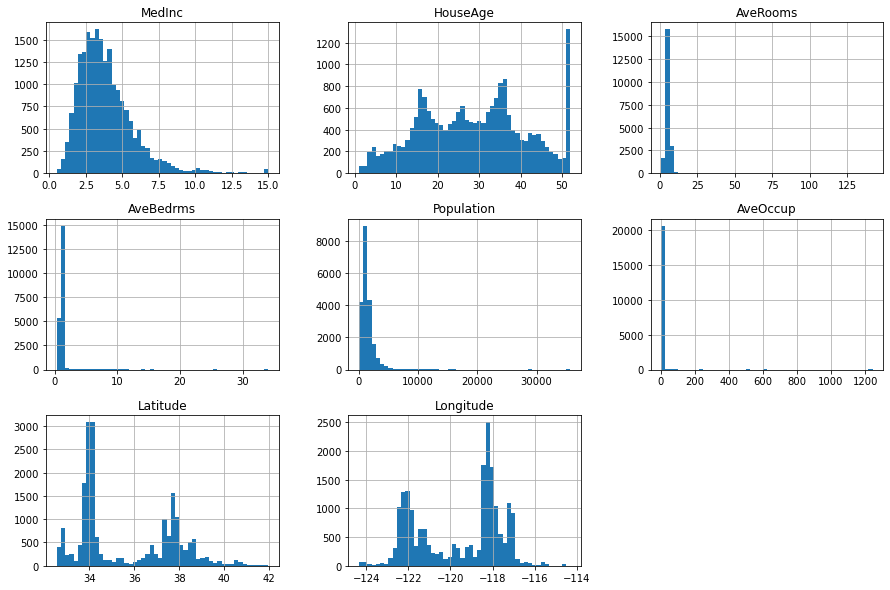

In [14]:
X.hist(figsize=(15,10),bins=50)
plt.show()

<AxesSubplot:>

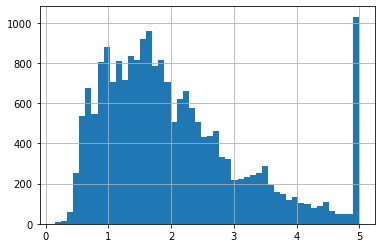

In [15]:
# Target Variable histogram
y.hist(bins=50)

In [16]:
income_vs_homevalue = pd.DataFrame({"MedInc": X["MedInc"],
                                    "Home_value": y})
income_vs_homevalue.head()

,MedInc,Home_value
0,8.3252,4.526
1,8.3014,3.585
2,7.2574,3.521
3,5.6431,3.413
4,3.8462,3.422


<AxesSubplot:xlabel='MedInc', ylabel='Home_value'>

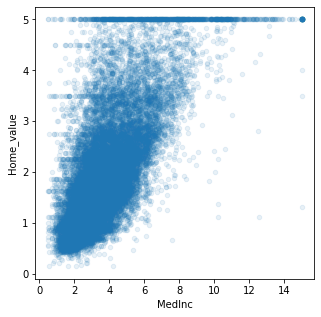

In [17]:
income_vs_homevalue.plot(kind="scatter", 
                           x="MedInc", 
                           y="Home_value",
                           alpha=0.1, 
                           figsize=(5,5))

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

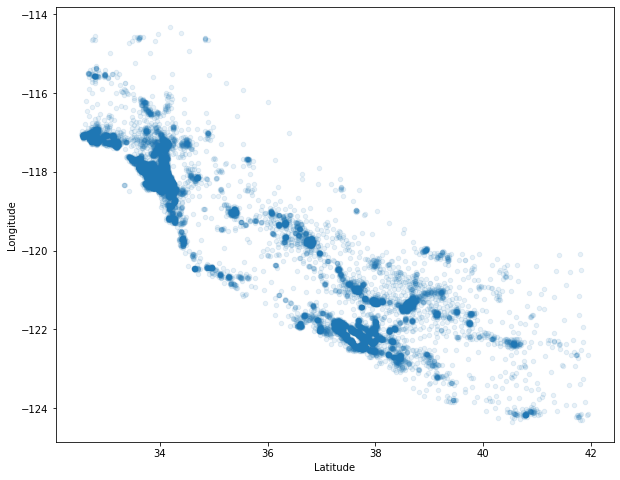

In [18]:
# Location of Homes in State of California
X.plot(kind="scatter", 
       x="Latitude", 
       y="Longitude", 
       figsize=(10,8),
       alpha= 0.1)  #alpha shows higher density

# Modeling

** Create training, validation, and test sets**

In [44]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.2, shuffle = True, random_state = 70)

# Use the same function above for the validation set
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 70)

In [33]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((12384, 8), (4128, 8), (12384,), (4128,))

## Fit and Score 3 models using r-square: 
* LinearRegression()
* DecisionTreeRegressir()
* RandomForestRegressor()

**Create function that fits and scores all 3 models**

In [53]:
model_dict = {
            "LinearRegression": LinearRegression(),
            "DecisionTreeRegressor": DecisionTreeRegressor(),
            "RandomForestRegressor": RandomForestRegressor()
            }


def fit_and_score(model, X_train, X_valid, y_train, y_valid):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    y_train: training labels
    X_test: testing data (no labels)
    y_test: test labels
    """
    np.random.seed(70)
    model_scores= {}
    for model_name, model in model_dict.items():
        model.fit(X_train, y_train)
        model_scores[model_name] = model.score(X_valid, y_valid)
    
    return model_scores

**Baseline Scores**

In [54]:
baseline_scores = fit_and_score(model_dict, 
                      X_train= X_train, 
                      X_valid = X_valid, 
                      y_train = y_train, 
                      y_valid = y_valid)

baseline_scores

{'LinearRegression': 0.606081676109014,
 'DecisionTreeRegressor': 0.5887005557342002,
 'RandomForestRegressor': 0.7951623335477782}

**Visualize scores**

In [55]:
scores_df = pd.DataFrame(baseline_scores, index=["accuracy"])
scores_df

,LinearRegression,DecisionTreeRegressor,RandomForestRegressor
accuracy,0.606082,0.588701,0.795162


(array([0, 1, 2]),
 [Text(0, 0, 'LinearRegression'),
  Text(1, 0, 'DecisionTreeRegressor'),
  Text(2, 0, 'RandomForstRegressor')])

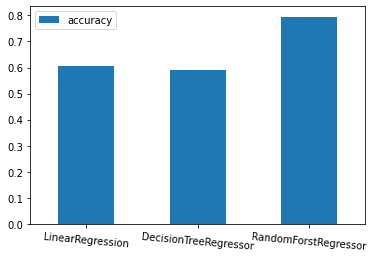

In [48]:
scores_df.T.plot(kind="bar")
plt.xticks(rotation= -5)

## Evaluation Metrics
* Mean squared error
* Root mean squared error

In [101]:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_test, y_preds):
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate our model
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_squared_error(y_train, train_preds),
              "Valid MAE": mean_squared_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

**RandomForestRegressor scores**

In [102]:
rf_scores = show_scores(model_dict["RandomForestRegressor"])
rf_scores

{'Training MAE': 0.03834183955569094,
 'Valid MAE': 0.2629295293119536,
 'Training RMSLE': 0.060410272595792035,
 'Valid RMSLE': 0.15410263533567,
 'Training R^2': 0.9713495054183386,
 'Valid R^2': 0.7951623335477782}

In [103]:
rf_score_df = pd.DataFrame(rf_scores, index=["accuracy"])
rf_score_df

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2
accuracy,0.038342,0.26293,0.06041,0.154103,0.97135,0.795162


Text(0.5, 1.0, 'RandomForestRegressor scores')

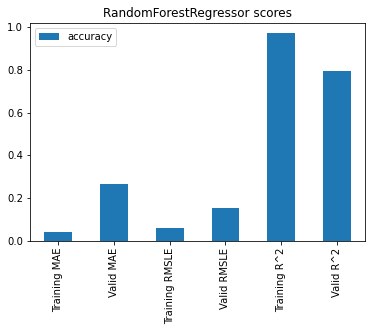

In [104]:
rf_score_df.T.plot(kind="bar")
plt.title("RandomForestRegressor scores")

**DecisionTreeRegressor scores**

In [105]:
dtr_scores= show_scores(model_dict["DecisionTreeRegressor"])
dtr_scores

{'Training MAE': 8.503951134286585e-32,
 'Valid MAE': 0.5279437671796511,
 'Training RMSLE': 4.696395207169332e-17,
 'Valid RMSLE': 0.21417778942717777,
 'Training R^2': 1.0,
 'Valid R^2': 0.5887005557342002}

In [106]:
dtr_score_df = pd.DataFrame(dtr_scores, index=["accuracy"])
dtr_score_df

,Training MAE,Valid MAE,Training RMSLE,Valid RMSLE,Training R^2,Valid R^2
accuracy,8.503951e-32,0.527944,4.696395e-17,0.214178,1.0,0.588701


Text(0.5, 1.0, 'DecisionTreeRegressor scores')

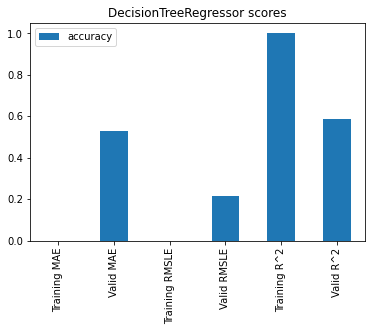

In [107]:
dtr_score_df.T.plot(kind="bar")
plt.title("DecisionTreeRegressor scores")

**Note: LinearRegression resulting in error due to a negative value being passed.**

# Hyperparameter tuning with RandomizedSearchCV

In [108]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 104, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9907 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Esti

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 343, in fit
    n_samples_bootstrap = _get_n_samples_bootstrap(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 104, in _get_n_samples_bootstrap
    raise ValueError(msg.format(n_samples, max_samples))
ValueError: `max_samples` must be in range 1 to 9908 but got value 10000

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [109]:
# Find the best parameters from the RandomizedSearch 
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 16,
 'min_samples_leaf': 17,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 5}

In [110]:
show_scores(rs_model)

{'Training MAE': 0.4403622808168827,
 'Valid MAE': 0.45229290410908135,
 'Training RMSLE': 0.21026747640040955,
 'Valid RMSLE': 0.21253858435373335,
 'Training R^2': 0.6709443968595523,
 'Valid R^2': 0.6476370559326493}

In [111]:
ideal_model = RandomForestRegressor(n_estimators=90,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=90,
                      n_jobs=-1)

In [112]:
show_scores(ideal_model)

{'Training MAE': 0.10506776849027097,
 'Valid MAE': 0.2532425768074643,
 'Training RMSLE': 0.09706657745159375,
 'Valid RMSLE': 0.15127861105161042,
 'Training R^2': 0.9214893294969473,
 'Valid R^2': 0.8027090429312604}

# Make predictions on test data

In [113]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
13688,7.7320,18.0,7.261719,0.980469,747.0,2.917969,34.15,-117.20
11155,3.2546,16.0,4.045726,1.121272,1118.0,2.222664,33.83,-117.97
15378,4.5000,11.0,6.191111,1.066667,1250.0,2.777778,33.36,-117.24
11183,3.4000,27.0,4.203077,1.003077,878.0,2.701538,33.82,-117.94
20074,4.0583,17.0,6.404255,2.000000,122.0,2.595745,38.13,-120.26


In [121]:
# Let's see how the model goes predicting on the test data
test_preds = ideal_model.predict(X_test)

In [123]:
df_preds = pd.DataFrame({"True Values": y_test,
                         "Predicted Values": test_preds})
df_preds

,True Values,Predicted Values
13688,1.732,3.194597
11155,1.875,2.022868
15378,2.226,2.150344
11183,1.969,1.982924
20074,0.875,1.456125
...,...,...
2864,0.676,0.898377
11719,1.583,1.539177
14278,0.785,0.964880
14743,1.424,1.494767


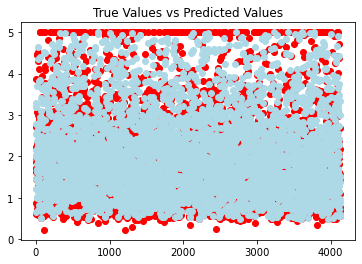

In [142]:
import matplotlib.pyplot as plt

x= np.arange(0, len(df_preds), 1)

plt.scatter(x,df_preds['True Values'], c= "red")
plt.scatter(x,df_preds['Predicted Values'], c= "lightblue")
plt.title("True Values vs Predicted Values")
plt.show()

# Feature Importance

In [143]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([0.47639271, 0.04732108, 0.0789986 , 0.02659312, 0.02264822,
       0.12799872, 0.11455202, 0.10549551])

In [150]:
import seaborn as sns

# Helper function for plotting feature importance
def plot_features(X_train_columns, feature_importances, n=20):
    df = (pd.DataFrame({"features": X_train_columns,
                        "feature_importance": feature_importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

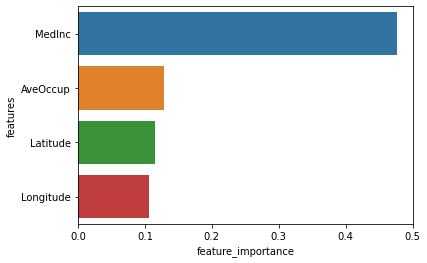

In [152]:
plot_features(X_train.columns, ideal_model.feature_importances_, n=4)